In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [6]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
print(df.shape)

(1143, 13)


In [8]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
X = df.drop(['quality', 'Id'], axis=1)

y = df['quality']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [19]:
X_pca

array([[-1.56154478,  0.44489171],
       [-0.76089236,  1.91505819],
       [-0.70808539,  0.91442316],
       ...,
       [-2.12463519,  0.87380431],
       [-2.20853569,  0.92834262],
       [-2.24173343,  1.00318928]], shape=(1143, 2))

In [ ]:
print("Principal Components:\n", pca.components_)
print("\nEigenvalues (Explained Variance):\n", pca.explained_variance_)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)


Principal Components:
 [[ 0.48533856 -0.22714317  0.46007532  0.17450629  0.22487011 -0.04785179
   0.01506861  0.39968417 -0.43284424  0.23755529 -0.11879903]
 [-0.10232799  0.28878641 -0.14650773  0.2522617   0.15313338  0.51702178
   0.57739283  0.21753697 -0.00637351 -0.06228016 -0.38163504]]

Eigenvalues (Explained Variance):
 [3.15892164 1.87990611]

Explained Variance Ratio:
 [0.28692345 0.17075104]


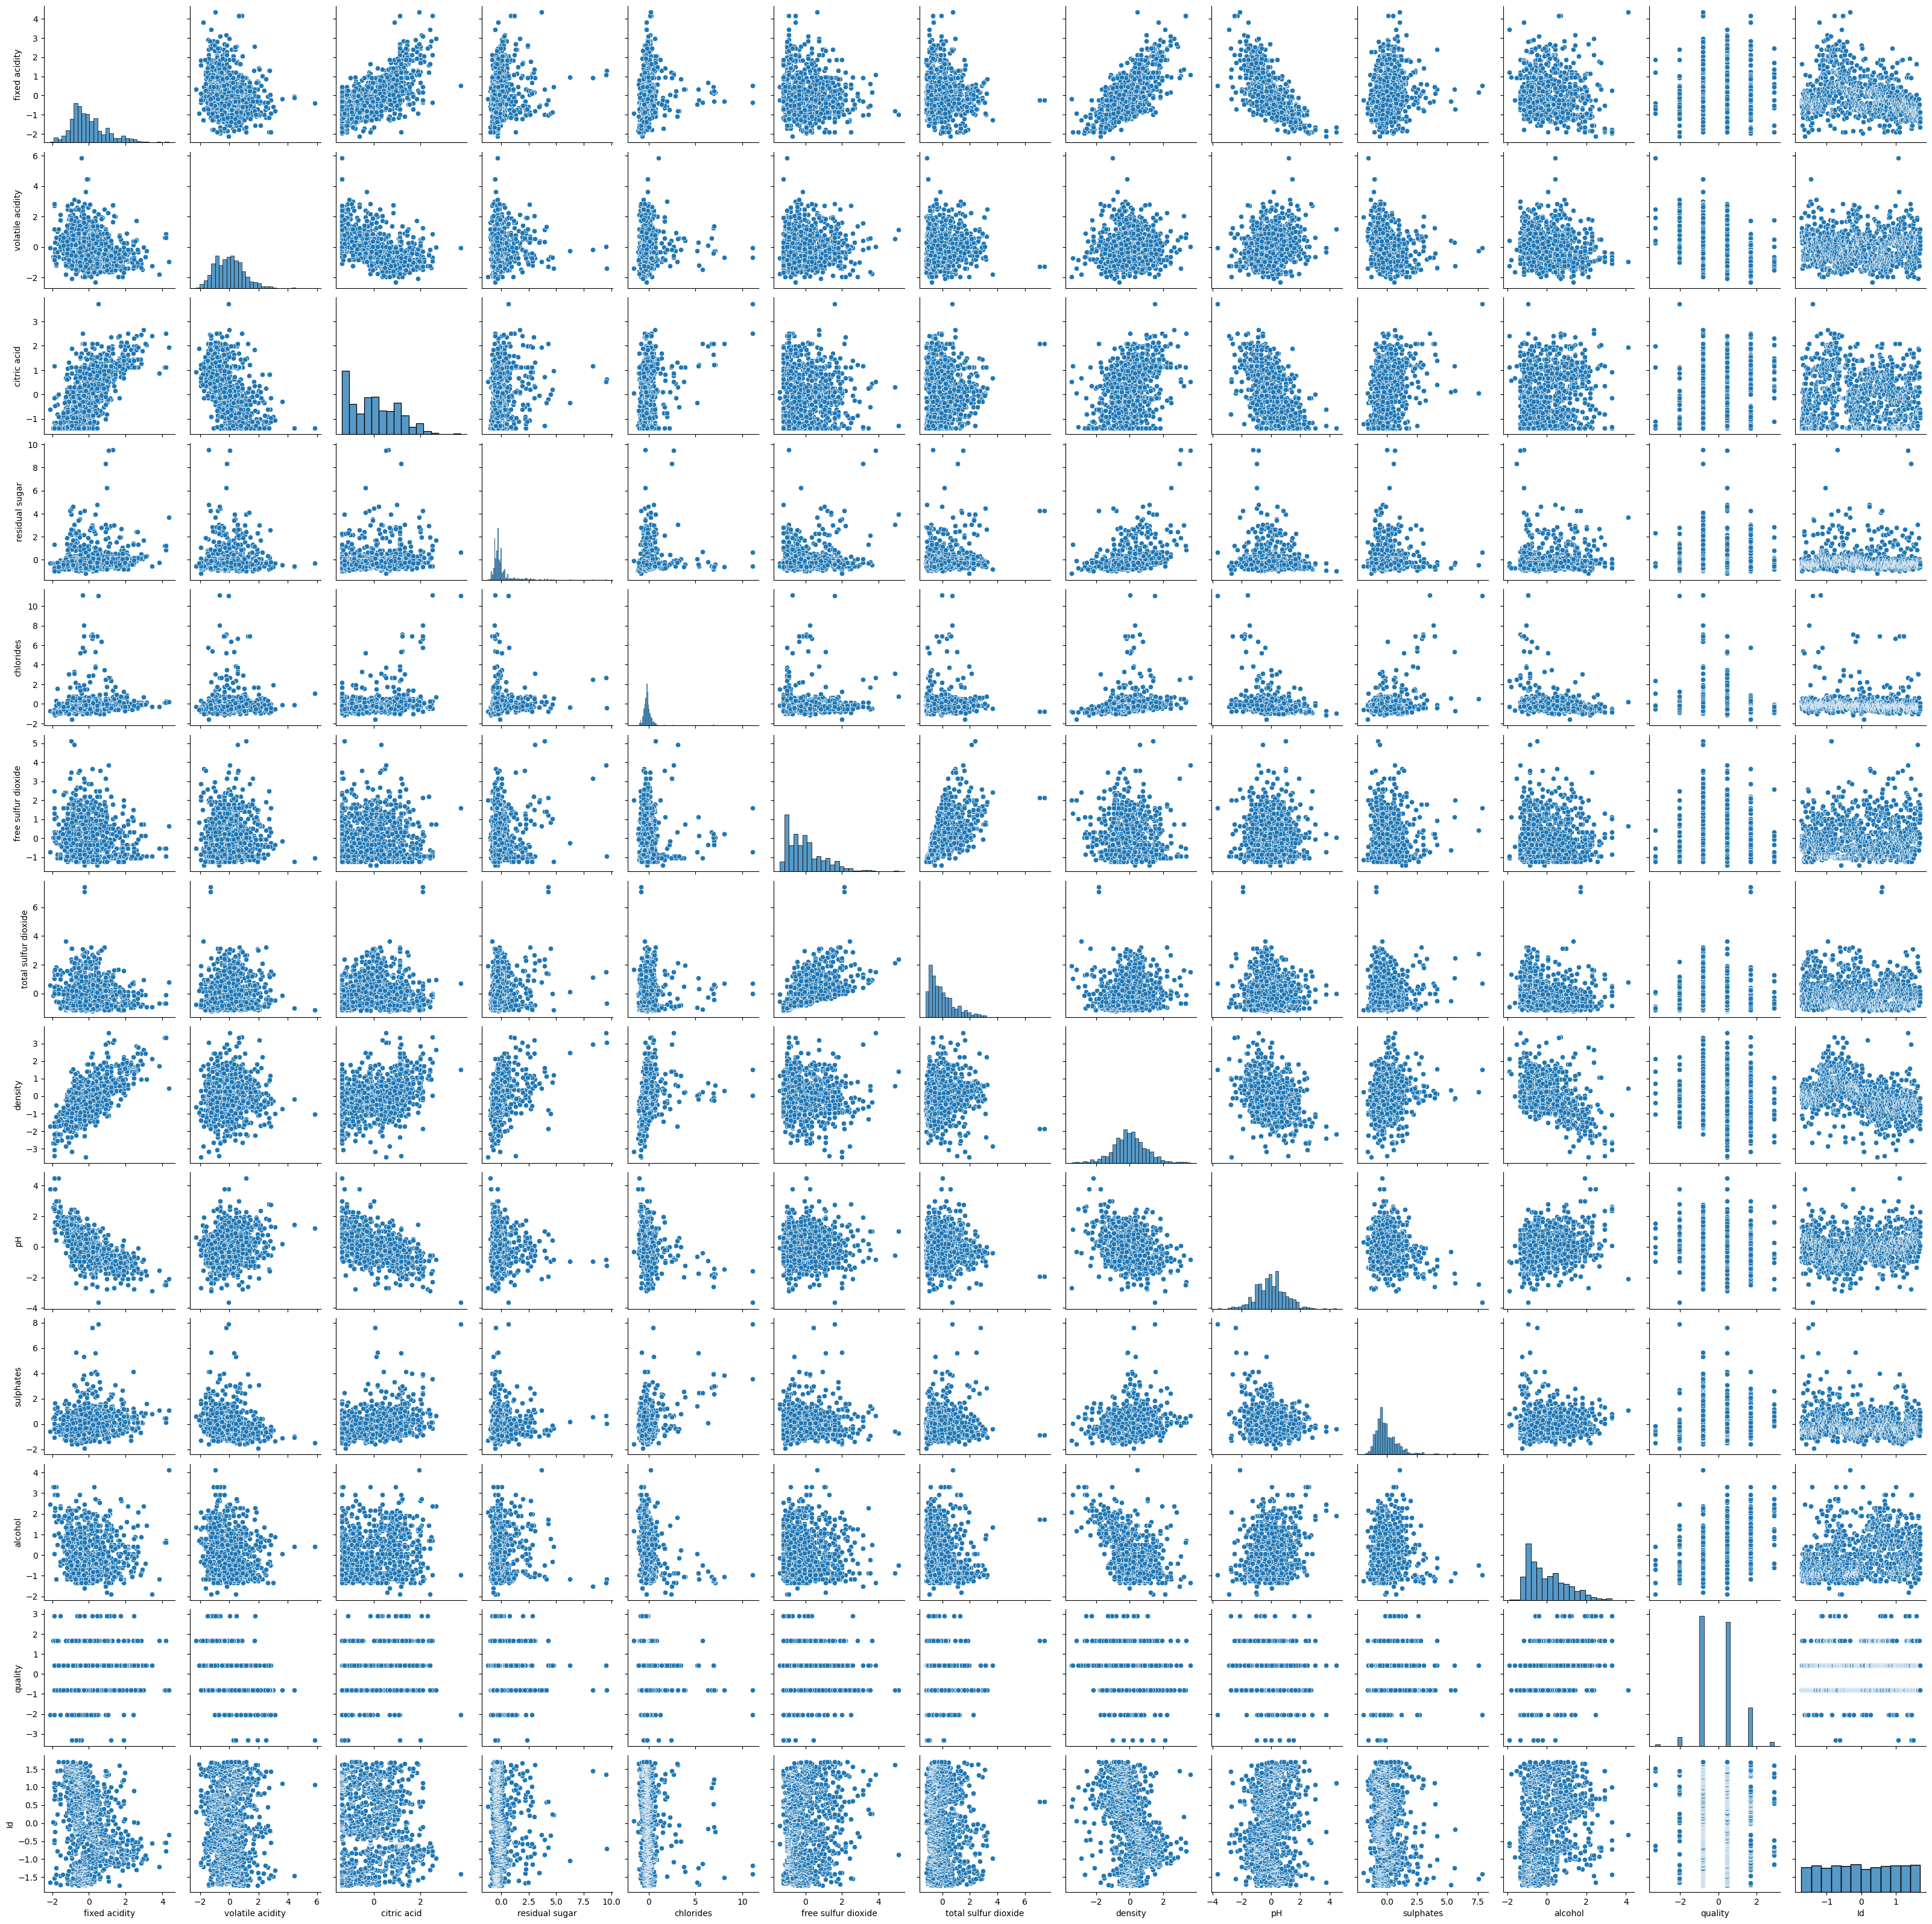

In [23]:
sns.pairplot(scaled_df)

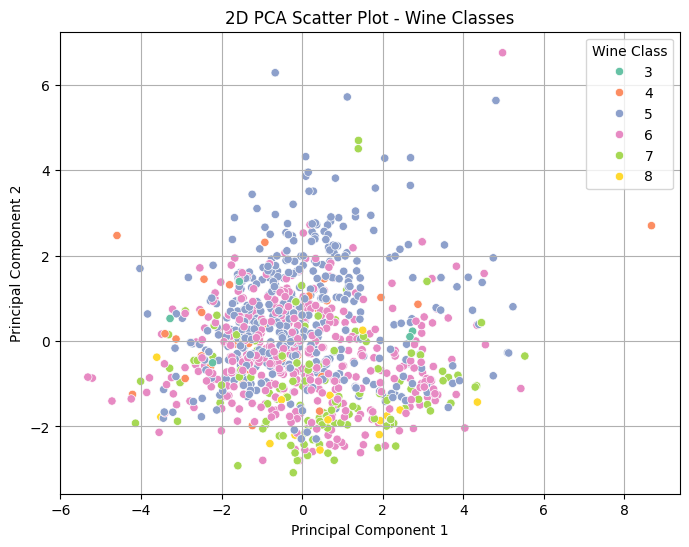

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot - Wine Classes")
plt.grid(True)
plt.legend(title='Wine Class')
plt.show()


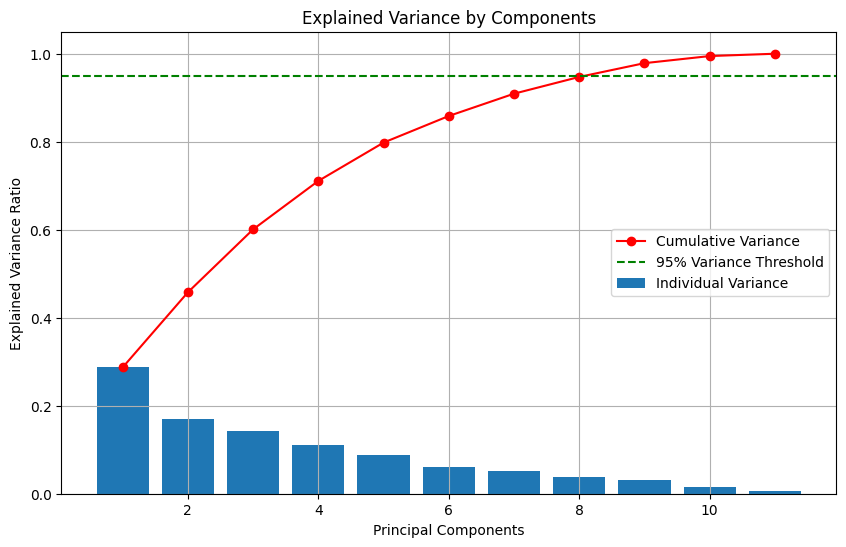

In [27]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
n_components = len(pca_full.explained_variance_ratio_)
plt.bar(range(1, n_components + 1), pca_full.explained_variance_ratio_, label="Individual Variance")
plt.plot(range(1, n_components + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o', label="Cumulative Variance", color='red')
#plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', label="Cumulative Variance", color='red')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Variance Threshold')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Components")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components required to retain at least 95% variance:", components_needed)



Number of components required to retain at least 95% variance: 9


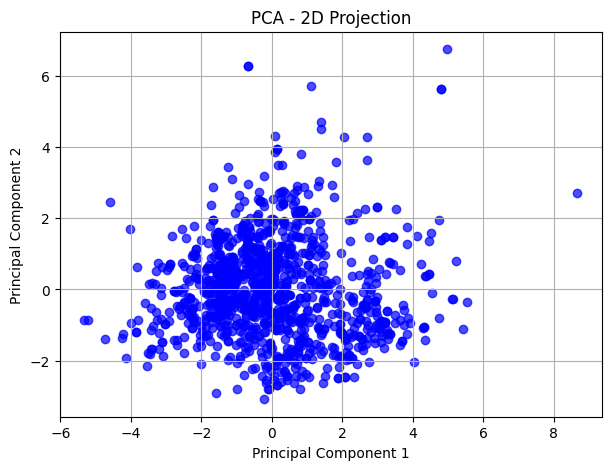

In [32]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['quality'] = y 

plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()


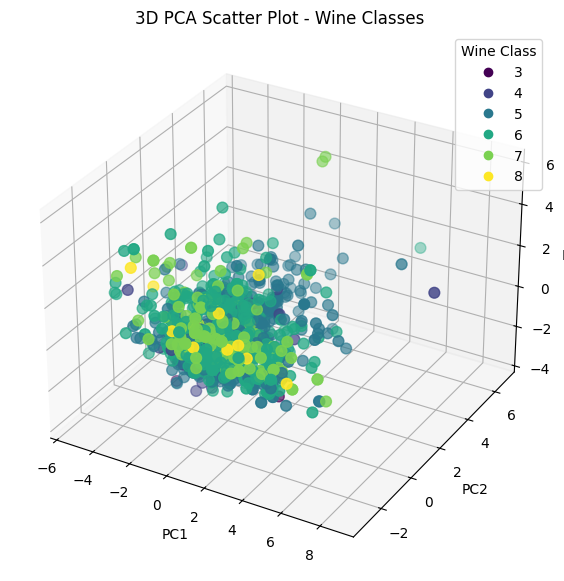

In [29]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', s=60)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot - Wine Classes')
plt.legend(*scatter.legend_elements(), title='Wine Class')
plt.show()
